<a href="https://colab.research.google.com/github/OmarKaempfer/simpsons-keras/blob/master/Simpsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


simpsons_dataset	       simpsons_dataset_full
simpsons_dataset_current_test  simpsons_dataset_test


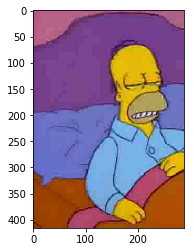

In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/datasets/"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/simpsons_dataset/homer_simpson/pic_0000.jpg', 'r')
imshow(np.asarray(pil_im))



In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Primer modelo

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import rmsprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time


# DATA SOURCE --------------------------------------------------

batch_size = 32

train_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/simpsons_dataset/'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/datasets/simpsons_dataset/'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=10,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(64, 64, 3),
                 padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', activation="relu")) 
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
                 
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=rmsprop(lr=0.0001, decay=1e-6),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 30

history = model.fit_generator(
        generator = train_generator,
        steps_per_epoch=320,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=100,
)

Found 10262 images belonging to 8 classes.
Found 10262 images belonging to 8 classes.
Epoch 1/30
320/320 [==============================] - 1809s 6s/step - loss: 1.6103 - acc: 0.4153 - val_loss: 1.3102 - val_acc: 0.5766
Epoch 2/30
320/320 [==============================] - 71s 221ms/step - loss: 1.2636 - acc: 0.5745 - val_loss: 1.0614 - val_acc: 0.6534
Epoch 3/30
320/320 [==============================] - 67s 209ms/step - loss: 1.0446 - acc: 0.6593 - val_loss: 0.8372 - val_acc: 0.7266
Epoch 4/30
320/320 [==============================] - 69s 214ms/step - loss: 0.8615 - acc: 0.7142 - val_loss: 0.8897 - val_acc: 0.7044
Epoch 5/30
320/320 [==============================] - 69s 215ms/step - loss: 0.7277 - acc: 0.7575 - val_loss: 0.5144 - val_acc: 0.8275
Epoch 6/30
320/320 [==============================] - 71s 221ms/step - loss: 0.6095 - acc: 0.7999 - val_loss: 0.4696 - val_acc: 0.8456
Epoch 7/30
320/320 [==============================] - 70s 218ms/step - loss: 0.5262 - acc: 0.8214 - val_l

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/simpsons_model.h5')

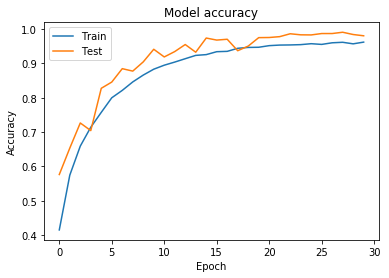

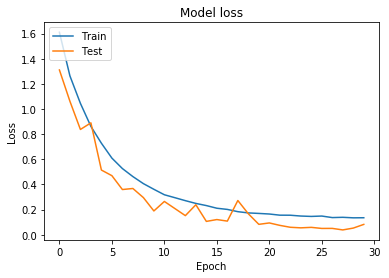

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Predicted class index:  0
bart_simpson
Predicted class index:  4
marge_simpson


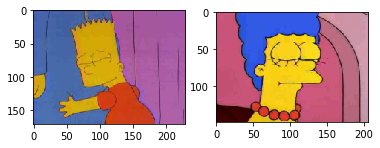

In [0]:
class_dict = {value: key for key, value in train_generator.class_indices.items()}

x = image.load_img('/content/drive/My Drive/Colab Notebooks/datasets/simpsons_dataset_current_test/bart_simpson/bart_simpson_7.jpg', target_size=(64,64))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

test_img = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/simpsons_dataset_current_test/bart_simpson/bart_simpson_7.jpg', 'r')
plt.subplot(1,2,1)
imshow(np.asarray(test_img))

predicted_class_index = model.predict_classes(x)[0]
print("Predicted class index: ", predicted_class_index)
print(class_dict[predicted_class_index])



x = image.load_img('/content/drive/My Drive/Colab Notebooks/datasets/simpsons_dataset_current_test/marge_simpson/marge_simpson_46.jpg', target_size=(64,64))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

test_img = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/simpsons_dataset_current_test/marge_simpson/marge_simpson_46.jpg', 'r')
plt.subplot(1,2,2)
imshow(np.asarray(test_img))

predicted_class_index = model.predict_classes(x)[0]
print("Predicted class index: ", predicted_class_index)
print(class_dict[predicted_class_index])

Predicted class index:  7
principal_skinner


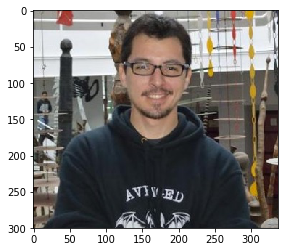

In [0]:
x = image.load_img('/content/drive/My Drive/Colab Notebooks/datasets/simpsons_dataset_current_test/marge_simpson/omar.jpg', target_size=(64,64))
x = image.img_to_array(x)
x = x.reshape((1,) + x.shape)
x = x/255.

test_img = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/simpsons_dataset_current_test/marge_simpson/omar.jpg', 'r')
imshow(np.asarray(test_img))

predicted_class_index = model.predict_classes(x)[0]
print("Predicted class index: ", predicted_class_index)
print(class_dict[predicted_class_index])